# Assignment 2 Witchcraftsurvey Project (Liang Jingyin, s2097352)

## Note
Because our data are packed in Access. So,I transfer the data from Access to Excel, and then transfer its format(.xlsx)to .csv before I start to do this analysis. Following, I start import data by .csv format.


# Describe
In Witchcraftsurvey project, I got fruitful and textual dataset. It includes different aspects of witches, such as the case details of witches, detail of acussed witch, ritual object, witches' shape changing when they accused, witches' meeting place, etc. There are about 53 files of dataset describing various information of witches. 
Our group have decided to focus on the relationship of ritual object and other different stuffs. So, we do different dataset to related to ritual object. 
## Topic of mine
After reading through all introduction of witchcraftsurty, I want to find out the relationship between Shapechanging and Ritual object. I want to know whether their shapechanging relate to specific ritual object. Also, from the structure of those 53 datasets, I found that Ritual Object and Shapechanging are linked by the Case reference (in Case table). Also, as the dataholder told us that they want us also focus on the person, the witch then to explore something. So, the information of accused witches in Accused table is also neccessary. And, how to link Accused to Ritual object and Shapechanging? The solution is also to link through the Case table by its case reference.So, for me, I finally choose 4 tables: 'WDB_Accused','WDB_Case','WDB_ShapeChanging' and 'WDB_RitualObject'.

## Import Data and Cleaning Data

In [47]:
# Necessary import
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = None#show all the columns in the following output, no omission
pd.options.display.max_rows = None#show all the rows in the following output, no omission

First, load the data.Because our data are packed in Access. So,I transfer the data from Access to Excel, and then transfer its format(.xlsx)to .csv before I start to do this analysis. Following, I start import data by .csv format.

In [48]:
#Read WDB_Case data
WDB_Accused = pd.read_csv("WDB_Accused.csv")
print("number of rows is ", WDB_Accused.shape[0])
WDB_Accused = WDB_Accused.dropna(subset=['AccusedRef', "Sex"])
WDB_Accused = WDB_Accused.reset_index(drop = True)#clean the data by cleaning its empty set
WDB_Accused.head()

number of rows is  3219


,Unnamed: 0,AccusedRef,AccusedSystemId,AccusedID,FirstName,LastName,M_Firstname,M_Surname,Alias,Patronymic,DesTitle,Sex,Age,Age_estcareer,Age_estchild,Res_settlement,Res_parish,Res_presbytery,Res_county,Res_burgh,Res_NGR_Letters,Res_NGR_Easting,Res_NGR_Northing,Ethnic_origin,MaritalStatus,SocioecStatus,Occupation,Notes,Createdby,Createdate,Lastupdatedby,Lastupdatedon
0,0,A/EGD/10,EGD,10,Mareon,Quheitt,Marion,White,NaN,NaN,NaN,Female,NaN,False,False,Sammuelston,P/JO/3539,Haddington,Haddington,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SMD,2001-05-15 11:06:51,jhm,2002-08-09 11:40:51
1,1,A/EGD/100,EGD,100,Thom,Cockburn,Thomas,Cockburn,NaN,NaN,NaN,Male,NaN,False,False,NaN,NaN,NaN,Haddington,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SMD,2001-05-15 11:06:51,jhm,2002-10-02 10:32:30
2,2,A/EGD/1000,EGD,1000,Christian,Aitkenhead,Christine,Aikenhead,NaN,NaN,NaN,Female,NaN,False,False,Rottinraw,NaN,NaN,Dumfries,NaN,NaN,NaN,NaN,NaN,Married,NaN,NaN,NaN,SMD,2001-05-15 11:06:51,jhm,2002-10-01 10:48:12
3,3,A/EGD/1001,EGD,1001,Janet,Ireland,Janet,Ireland,NaN,NaN,NaN,Female,NaN,False,False,Rottinraw,NaN,NaN,Dumfries,NaN,NaN,NaN,NaN,NaN,Widowed,NaN,NaN,NaN,SMD,2001-05-15 11:06:51,jhm,2002-10-01 10:49:00
4,4,A/EGD/1002,EGD,1002,Agnes,Hendersoun,Agnes,Henderson,NaN,NaN,NaN,Female,NaN,False,False,NaN,P/ST/1446,Stirling,Stirling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SMD,2001-05-15 11:06:51,jhm,2002-10-01 10:50:07


In [49]:
# Read WDB_Case data
WDB_Case = pd.read_csv("WDB_Case.csv")
print("number of rows is ", WDB_Case.shape[0])
WDB_Case = WDB_Case.dropna(subset=['AccusedRef', "CaseRef"])
#clean the data by cleaning its empty set
WDB_Case = WDB_Case.reset_index(drop = True)
# Have a look at it
WDB_Case.head()

number of rows is  3413


,Unnamed: 0,CaseRef,CaseId,CaseSystemId,NamedIndividual,AccusedRef,CaseStart_date,CaseStart_date_as_date,Case_date,Case_date_as_date,Age_at_case,CaseCommonName,Commission,Complaint,Correspondence,Chronicle,Other,Suspects_text,UNorthodoxRelPract_p,UNorthodoxRelPract_s,Consulting_p,Consulting_s,Demonic_p,Demonic_s,Demonic_possess_p,Demonic_possess_s,Fairies_p,Fairies_s,Folk_healing_p,Folk_healing_s,Maleficium_p,Maleficium_s,Midwifery_p,Midwifery_s,ImplicatedByAnother_p,ImplicatedByAnother_s,Neighbhd_dispute_p,Neighbhd_dispute_s,PoliticalMotive_p,PoliticalMotive_s,PropertyMotive_p,PropertyMotive_s,RefusedCharity_p,RefusedCharity_s,Treason_p,Treason_s,Other_p,Other_s,OtherText,NotEnoughInfo_p,NotEnoughInfo_s,WhiteMagic_p,WhiteMagic_s,Charnotes,DemonicPact,DevilNotes,WitchesMeeting,MeetingName,DevilPresent,Maleficium,CommunalSex,DevilWorship,FoodAndDrink,Dancing,Singing,SingingText,OtherPractices,MeetingNotes,Elphane/Fairyland,Food/Drink,SpecificVerbalFormulae,SpecificRitualActs,Familiars,Shape-Changing,Dreams/Visions,UnorthodoxReligiousPractice,SympatheticMagic,Ridingdead,FolkNotes,HumanIllness,HumanDeath,AnimalIllness,AnimalDeath,FemaleInfertility,MaleImpotence,AggravatingDisease,TransferringDisease,LayingOn,Removalbewitchment,Quarreling,Cursing,Poisoning,RecHealer,HealingHumans,HealingAnimals,Midwifery,DiseaseNotes,PropertyDamage,WeatherModification,OtherMaleficiaNotes,OtherChargesNotes,ClaimedBewitched,ClaimedPossessed,AdmitLesserCharge,ClaimedNaturalCauses,Nodefence,DefenseNotes,CaseNotes,Createdby,Createdate,Lastupdatedby,Lastupdatedon
0,1,C/EGD/100,100,EGD,-1.0,A/EGD/89,27/1/1591,NaN,8/5/1591,NaN,NaN,"Kerington,Cristine",NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,NaN,True,True,False,False,Part of the North Berwick witch hunt. It invo...,False,Said by others to have met the devil as a 'mek...,False,NaN,False,False,False,False,False,False,False,NaN,NaN,See Agnes Sampson's case for description of No...,False,False,False,False,False,False,False,False,False,False,In other accused's confession it was said that...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,False,False,NaN,NaN,False,False,False,False,False,NaN,NaN,SMD,2001-05-15 17:00:16,jhm,2002-10-10 14:51:54
1,2,C/EGD/1000,1000,EGD,-1.0,A/EGD/989,6/5/1627,NaN,6/5/1627,NaN,NaN,"Craig,Christiane",NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,True,True,False,False,NaN,False,NaN,False,NaN,False,False,False,False,False,False,False,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,False,False,NaN,NaN,False,False,False,False,False,NaN,NaN,SMD,2001-05-15 17:00:16,jhm,2002-10-09 15:52:09
2,3,C/EGD/1001,1001,EGD,-1.0,A/EGD/990,NaN,NaN,25/4/1627,NaN,NaN,"Ronaldson,Margaret",NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,True,True,False,False,NaN,False,NaN,False,NaN,False,False,False,False,False,False,False,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,False,False,NaN,NaN,False,False,False,False,False,NaN,NaN,SMD,2001-05-15 17:00:16,jhm,2002-09-18 15:23:08
3,4,C/EGD/1002,1002,EGD,-1.0,A/EGD/991,NaN,NaN,3/5/1627,NaN,NaN,"Broun,Bessie",NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [50]:
# Read WDB_ShapeChanging data
WDB_ShapeChanging = pd.read_csv("WDB_ShapeChanging.csv")
print("number of rows is ", WDB_ShapeChanging.shape[0])
#Delete empty set
WDB_ShapeChanging = WDB_ShapeChanging.dropna(subset=['Details'])
WDB_ShapeChanging.head()

number of rows is  59


,Unnamed: 0,ShapeChangingRef,ShapeChangingSystemId,ShapeChangingID,CaseRef,ShapeChanging_Type,Details,Createdby,Createdate,Lastupdatedby,Lastupdatedon
0,0,SC/JO/1,JO,1,C/EGD/2120,Animal,dog (tyke),jhm,2001-05-16 16:50:39,jhm,2001-06-25 10:01:18
1,1,SC/JO/14,JO,14,C/EGD/402,Animal,cat,jhm,2001-07-11 10:15:37,jhm,2001-07-11 10:15:43
2,2,SC/JO/15,JO,15,C/EGD/400,Animal,cat,jhm,2001-07-16 10:45:45,jhm,2001-07-16 10:45:51
3,3,SC/JO/16,JO,16,C/JO/2846,Apparition,as herself,jhm,2001-07-24 10:27:32,jhm,2002-11-13 14:29:50
4,4,SC/JO/17,JO,17,C/JO/2882,Animal,cats,jhm,2001-09-07 13:14:27,jhm,2001-09-07 13:14:33


Then,add the columns/ link other data resources to the table 'WDB_ShapeChanging'

In [51]:
WDB_ShapeChanging["RitualObject_Type"] = 0  
WDB_ShapeChanging["Sex"] = 0                
WDB_ShapeChanging["FirstName"] = 0
WDB_ShapeChanging["LastName"] = 0
WDB_ShapeChanging["M_Firstname"] = 0 
WDB_ShapeChanging["M_Surname"] = 0

In [52]:
#choose the useful data
WDB_ShapeChanging2 = WDB_ShapeChanging[["CaseRef", "ShapeChanging_Type", "Details","RitualObject_Type", "Sex", "FirstName", "LastName", "M_Firstname", "M_Surname"]]
#reset index value/ order
WDB_ShapeChanging2 = WDB_ShapeChanging2.reset_index(drop = True)
WDB_ShapeChanging2.head()

,CaseRef,ShapeChanging_Type,Details,RitualObject_Type,Sex,FirstName,LastName,M_Firstname,M_Surname
0,C/EGD/2120,Animal,dog (tyke),0,0,0,0,0,0
1,C/EGD/402,Animal,cat,0,0,0,0,0,0
2,C/EGD/400,Animal,cat,0,0,0,0,0,0
3,C/JO/2846,Apparition,as herself,0,0,0,0,0,0
4,C/JO/2882,Animal,cats,0,0,0,0,0,0


In [53]:
#Read WDB_RitualObject.csv
WDB_RitualObject = pd.read_csv("WDB_RitualObject.csv")
print("number of rows is ", WDB_RitualObject.shape[0])
#Delete the empty set of the column'RitualObject_Type'
WDB_RitualObject = WDB_RitualObject.dropna(subset=['RitualObject_Type'])
#reset index value/ order
WDB_RitualObject = WDB_RitualObject.reset_index(drop = True)
WDB_RitualObject.head()

number of rows is  632


,Unnamed: 0,RitualObjectRef,RitualObjectSystemId,RitualObjectID,CaseRef,RitualObject_Type,Createdby,Createdate,Lastupdatedby,Lastupdatedon
0,0,RO/JO/1,JO,1,C/JO/2632,Yarn,jhm,2001-05-17 12:03:06,jhm,2002-11-13 15:51:53
1,1,RO/JO/2,JO,2,C/JO/2632,Egg,jhm,2001-05-17 12:03:28,jhm,2002-11-13 15:50:17
2,2,RO/JO/3,JO,3,C/JO/2632,Meal,jhm,2001-05-17 12:03:35,jhm,2002-11-13 15:50:19
3,3,RO/JO/316,JO,316,C/EGD/2453,Water,jhm,2001-10-24 09:24:42,jhm,2001-10-24 09:24:43
4,4,RO/JO/317,JO,317,C/EGD/142,Elfshot,jhm,2001-11-06 11:52:29,jhm,2002-02-28 14:52:17


Here,link each columns/data by each same Case Reference

In [54]:
#Arrange the characteristic column caseref, and find the corresponding ritualobject according to caseref
for num in range(len(WDB_ShapeChanging2["CaseRef"])):
    list_store = []
    for number in range(len(WDB_RitualObject['CaseRef'])):
        if WDB_ShapeChanging2["CaseRef"].iloc[num] ==  WDB_RitualObject['CaseRef'].iloc[number]:
            list_store.append(WDB_RitualObject['RitualObject_Type'][number])
    # print("list_store = ", list_store)
    if len(list_store)>0:
        WDB_ShapeChanging2["RitualObject_Type"][num] = list_store#Store the sorted Ritualobject according to caseref
    for num2 in range(len(WDB_Case['CaseRef'])):
        #According to CaseRef, find the corresponding index of Case
        if WDB_ShapeChanging2["CaseRef"].iloc[num] == WDB_Case['CaseRef'].iloc[num2]:
                for num3 in range(len(WDB_Accused["AccusedRef"])):
                    if WDB_Case['AccusedRef'].iloc[num2] == WDB_Accused["AccusedRef"].iloc[num3]:#if found out the corresponding AccusedRef, then store in the dataset 
                        WDB_ShapeChanging2['Sex'].iloc[num] = WDB_Accused["Sex"].iloc[num3] #if find the corresponding Sex in WDb_Accused, then store in the dataset
                        WDB_ShapeChanging2["FirstName"][num] =  WDB_Accused["FirstName"].iloc[num3]#if find the corresponding FirstName in WDb_Accused, then store in the dataset
                        WDB_ShapeChanging2["LastName"].iloc[num] =  WDB_Accused["LastName"].iloc[num3]#if find the corresponding LastName in WDb_Accused, then store in the dataset
                        WDB_ShapeChanging2["M_Firstname"].iloc[num] =  WDB_Accused["M_Firstname"].iloc[num3]#if find the corresponding M_Firstname in WDb_Accused, then store in the dataset
                        WDB_ShapeChanging2["M_Surname"].iloc[num] =  WDB_Accused["M_Surname"].iloc[num3]#if find the corresponding M_Surname in WDb_Accused, then store in the dataset
                        break

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [55]:
#just for check
# print("WDB_ShapeChanging2.head()", WDB_ShapeChanging2.head())

for num2 in range(len(WDB_ShapeChanging2["RitualObject_Type"])):
    if WDB_ShapeChanging2["RitualObject_Type"][num2] == 0:
        WDB_ShapeChanging2 = WDB_ShapeChanging2.drop(index=num2) #Delete the empty set
WDB_ShapeChanging2 = WDB_ShapeChanging2.reset_index(drop = True)#reset index value/ order
WDB_ShapeChanging2.head()

,CaseRef,ShapeChanging_Type,Details,RitualObject_Type,Sex,FirstName,LastName,M_Firstname,M_Surname
0,C/JO/2882,Animal,cats,[Water],Female,Magaret,Alexander,Margaret,Alexander
1,C/EGD/2160,Apparition,as herself or a devil in her likeness,"[Pottage, Stones]",Female,Agnes,Wobster,Agnes,Webster
2,C/EGD/2122,Animal,hares,[Tree],Female,Bessie,Thom,Elizabeth,Thom
3,C/EGD/2122,Animal,cats,[Tree],Female,Bessie,Thom,Elizabeth,Thom
4,C/EGD/2327,Animal,porpoise (pellack whale),[Bannock],Female,Marion,Peebles,Marion,Peebles


Now I will assert the data whether it is clean without empty set.

In [56]:
assert all(WDB_ShapeChanging2['CaseRef'] != " ")
assert all(WDB_ShapeChanging2['ShapeChanging_Type'] != " ")
assert all(WDB_ShapeChanging2['Details'] != " ")
assert all(WDB_ShapeChanging2['RitualObject_Type'] != " ")
assert all(WDB_ShapeChanging2['Sex'] != " ")
assert all(WDB_ShapeChanging2['FirstName'] != " ")
assert all(WDB_ShapeChanging2['LastName'] != " ")
assert all(WDB_ShapeChanging2['M_Firstname'] != " ")
assert all(WDB_ShapeChanging2['M_Surname'] != " ")

## Simple Statistical Questions
Here, I will do some statistical questions for my dataset.Because my dataset is in textual form, so I mostly to caculate each variable's frequency to understand it.


Q1:How many rows are in the dataset after cleaning?

In [57]:
print("number of rows is ", WDB_ShapeChanging2.shape[0])

number of rows is  26


Q2:How many columns are in the dataset after cleaning?

In [58]:
print("number of colums is ", len(WDB_ShapeChanging2.columns))

number of colums is  9


Q3:What is the size of the dataset after cleaning?

In [59]:
print("size is {0}".format(len(WDB_ShapeChanging2)) + " x {0}".format(len(WDB_ShapeChanging2.columns)))

size is 26 x 9


Q4:How many types in ShapeChanging? 

In [60]:
print(  "The number of types in ShapeChanging is", len( WDB_ShapeChanging2["ShapeChanging_Type"].value_counts()))

The number of types in ShapeChanging is 5


Q5:How many times does each happen and their each proportion?

In [61]:
data1 = pd.DataFrame({"rate":WDB_ShapeChanging2["ShapeChanging_Type"].value_counts(normalize=True)})
data2 = pd.DataFrame({"amount":WDB_ShapeChanging2["ShapeChanging_Type"].value_counts()})
print(pd.concat([data2, data1], join="inner", axis=1 ))

            amount      rate
Animal          13  0.500000
Apparition       8  0.307692
Vision           2  0.076923
Spirit           2  0.076923
In Dream         1  0.038462


Q6:How many times does each Detail happen in each ShapeChanging type? And each proportion?

In [62]:
q6 = WDB_ShapeChanging2.groupby(WDB_ShapeChanging2["ShapeChanging_Type"])#do the classification of ShapeChanging_Type
for key, value in q6:
    #link Detail and ShapeChanging type in each classification, and sort their each times and proportion
    data1 = pd.DataFrame({"rate":value["Details"].value_counts(normalize=True)})
    data2 = pd.DataFrame({"amount":value["Details"].value_counts()})
    print(key, " = ", pd.concat([data1,data2], join="inner", axis=1))

Animal  =                                rate  amount
cats                      0.153846       2
Brok, [badger]            0.076923       1
cat                       0.076923       1
hare                      0.076923       1
Hare                      0.076923       1
flew like a bird          0.076923       1
hares                     0.076923       1
a cat with her face       0.076923       1
a Dog                     0.076923       1
Jackdaw (Kea)             0.076923       1
porpoise (pellack whale)  0.076923       1
cats in a fire            0.076923       1
Apparition  =                                          rate  amount
cat                                    0.125       1
as herself or a devil in her likeness  0.125       1
to a man caught in a whirlwind         0.125       1
to man in his sleep                    0.125       1
bedside and bedfoot many times         0.125       1
for 8 nights, then suffocated a child  0.125       1
at the foot of a man's bed             0.125

Q7:How many times and rate does each combination of Ritual object happen?

In [63]:
data1 = pd.DataFrame({"rate":WDB_ShapeChanging2["RitualObject_Type"].value_counts(normalize=True)})
data2 = pd.DataFrame({"amount":WDB_ShapeChanging2["RitualObject_Type"].value_counts()})
pd.concat([data1, data2], join="inner", axis=1 )

,rate,amount
"[Corpse, Nail trimmings, Grain, Herb, Wax/clay images, Thread, Water, Beetle, Toad, Flesh, Liver, Cloth]",0.115385,3
[Flesh],0.115385,3
"[Thread, Oil, Egg, Garlic, Aqua Vitae]",0.076923,2
[Tree],0.076923,2
"[Pot, Cat]",0.076923,2
"[Yarn, Cat, Salt, Lee Penny, Flask of Water]",0.076923,2
"[Bannock, Meal]",0.038462,1
"[Lead, Thread]",0.038462,1
"[Stones, Herb, Water, Flesh]",0.038462,1
"[Sieve, Thread, Shears]",0.038462,1


Q8:How many times and rate does each combination of Ritual object happen in each kind of ShapeChanging type?

In [64]:
for key, value in q6:
    print(key)
    data1 = pd.DataFrame({"rate":value["RitualObject_Type"].value_counts(normalize=True)})
    data2 = pd.DataFrame({"amount":value["RitualObject_Type"].value_counts()})
    print(pd.concat([data2,data1], join="inner", axis=1))

Animal
                                                    amount      rate
[Corpse, Nail trimmings, Grain, Herb, Wax/clay ...       3  0.230769
[Tree]                                                   2  0.153846
[Pot, Cat]                                               1  0.076923
[Sieve, Thread, Shears]                                  1  0.076923
[Water]                                                  1  0.076923
[Bannock, Meal]                                          1  0.076923
[Stones, Herb, Water, Flesh]                             1  0.076923
[Yarn, Cat, Salt, Lee Penny, Flask of Water]             1  0.076923
[Bannock]                                                1  0.076923
[Wax/clay images, Bone, Hair, Blood (animal)]            1  0.076923
Apparition
                                        amount   rate
[Flesh]                                      3  0.375
[Thread, Oil, Egg, Garlic, Aqua Vitae]       2  0.250
[Pottage, Stones]                            1  0.125
[Leathe

Q9:How many of male or female happen in different shapechanging?

In [65]:
for key, value in q6:
    data1 = pd.DataFrame({"rate":value["Sex"].value_counts(normalize=True)})
    data2 = pd.DataFrame({"amount":value["Sex"].value_counts()})    
    print(key, " = ",pd.concat([value["Sex"].value_counts(),value["Sex"].value_counts(normalize=True)], join="inner", axis=1))

Animal  =          Sex       Sex
Female   12  0.923077
Male      1  0.076923
Apparition  =          Sex  Sex
Female    8  1.0
In Dream  =          Sex  Sex
Female    1  1.0
Spirit  =          Sex  Sex
Female    2  1.0
Vision  =          Sex  Sex
Female    2  1.0


# Exploration
Here, I am going to draw graphs to explore the relationship between each variables. Because my dataset are in textual, so all most of my graph are shown in histogram.

How is the distribution of each shapechanging type?

data =  Animal        13
Apparition     8
Vision         2
Spirit         2
In Dream       1
Name: ShapeChanging_Type, dtype: int64


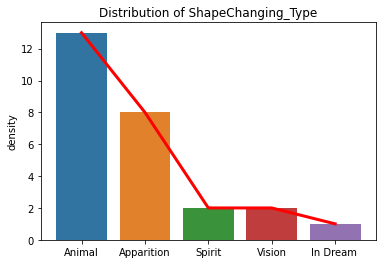

In [66]:
data = WDB_ShapeChanging2["ShapeChanging_Type"].value_counts()#calculate each type in ShapeChanging_Type
print("data = ",data )
x = ["Animal", "Apparition", "Spirit", "Vision", "In Dream "] #choose the variable of X
chart1 = sns.barplot(x = x, y = data)                            
plt.plot(x,  data, color = "red", linewidth = 3)        
chart1.set_ylabel("density")
chart1.set_title('Distribution of ShapeChanging_Type')  
plt.show()    

Findings: From the graph, it can draw that witches are mostly change their type in Animal type, and then fllowing by Apparition, Spirit, Vision and In Dream. Especially, there is a sudden drop between (Animal,Apparition) and (Spirit, Vision and In Dream).

How many times does each detail type show in the general type of shapechanging? For example, how many times does cat show in Animal type?

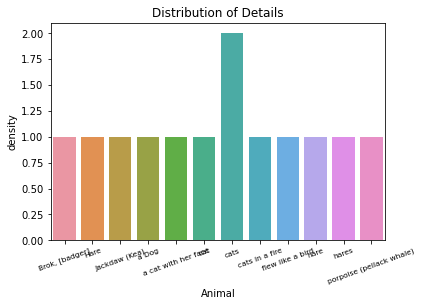

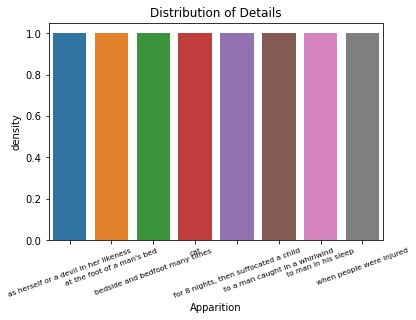

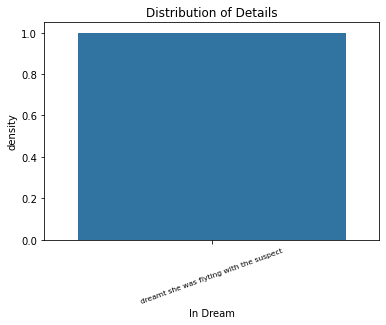

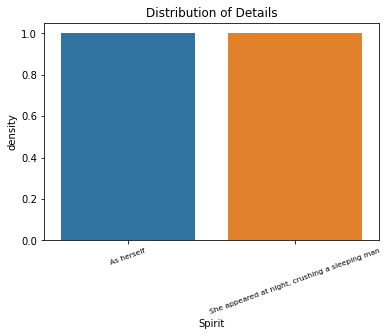

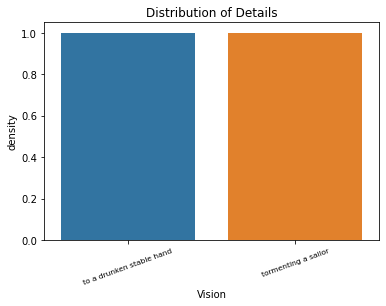

In [67]:
for key, value in q6:
    x2 = []                                                     
    y2 = []                                                    
    q7 = value['Details'].groupby(value['Details'])
    for key2, value2 in q7:
        y2.append(value2.value_counts()[0])           
        x2.append(key2)
    chart2 = sns.barplot(x=x2, y=y2)         
    chart2.set(xlabel=key, ylabel='density') 
    chart2.set_title('Distribution of Details') 
    plt.tick_params(axis='x', labelsize=7.5)
    plt.xticks(rotation = 20) 
    plt.show()

Findings: From above five graphs, we can see that: in Animal type, Cat is the most frequesnt type which witches change themselves. And, there are 12 kinds of Animal types. It is more than any other general types. And then, for apparition, each kind of types are average. And there are 8 types in Apparition. For In Dream, there is only one type and just show for one time. For Spirit and Vision, there are two kinds of types for each.

What is the frequency of each ritual object show under different Shapechanging type?

d  {'Water': 5, 'Tree': 2, 'Bannock': 2, 'Corpse': 3, 'Nail trimmings': 3, 'Grain': 3, 'Herb': 4, 'Wax/clay images': 4, 'Thread': 4, 'Beetle': 3, 'Toad': 3, 'Flesh': 4, 'Liver': 3, 'Cloth': 3, 'Yarn': 1, 'Cat': 2, 'Salt': 1, 'Lee Penny': 1, 'Flask of Water': 1, 'Pot': 1, 'Meal': 1, 'Bone': 1, 'Hair': 1, 'Blood (animal)': 1, 'Stones': 1, 'Sieve': 1, 'Shears': 1}


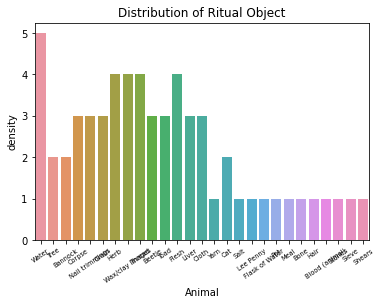

d  {'Pottage': 1, 'Stones': 1, 'Flesh': 3, 'Thread': 2, 'Oil': 2, 'Egg': 2, 'Garlic': 2, 'Aqua Vitae': 2, 'Leather Strap': 1, 'Wax/clay images': 1, 'Knife': 1, 'Salt': 1}


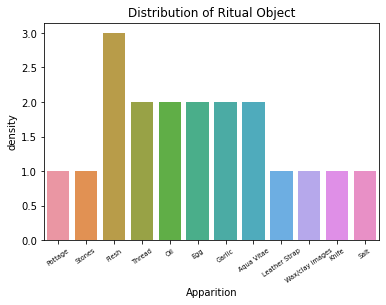

d  {'Belt': 1}


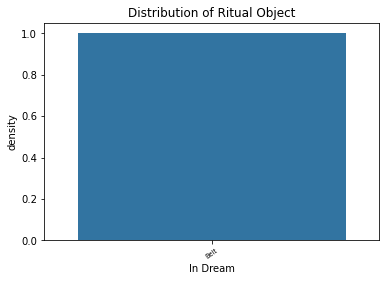

d  {'Pot': 1, 'Cat': 1, 'Lead': 1, 'Thread': 1}


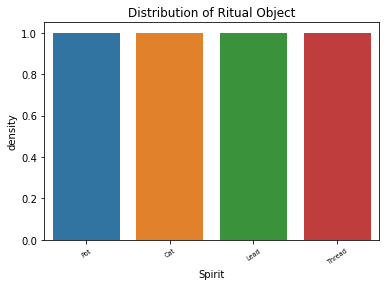

d  {'Yarn': 1, 'Cat': 1, 'Salt': 1, 'Lee Penny': 1, 'Flask of Water': 1, 'Coin': 1}


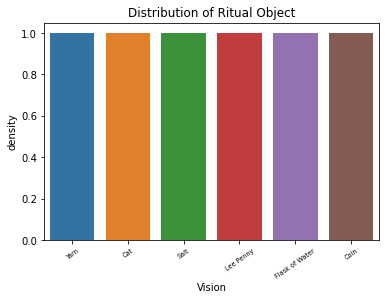

In [68]:
for key, value in q6:
    x2= []
    x_store = []        
    y_store = []  
    ele_store = []
    d = {}
    for value2 in value["RitualObject_Type"]:   #Calculate the frequency of each ritual object in each Shapechanging type
            for ele in value2:
                ele_store.append(ele)
    for ele2 in ele_store:
        if not ele2 in d:
            d[ele2] = 1
        else:
            d[ele2]+=1
    print("d ", d)

    for number_code in d:
        x_store.append(number_code)
        y_store.append(d[number_code])
    chart3 = sns.barplot(x=x_store, y=y_store)
    plt.tick_params(axis='x', labelsize=6.5)
    plt.xticks(rotation = 35) 
    chart3.set(xlabel=key, ylabel= 'density')
    chart3.set_title('Distribution of Ritual Object') 
    plt.show()

Findings: From above, there are 5 graphs divided by 5 general shapechanging type. For Animal, It has the most kinds of ritual object used in it. And 'Water' is the most, then is the 'Herb', 'Flesh', 'Thread', etc. For Apparition, witch like to use 'Flesh' the most. And in Apparition, its number ritual object types is ranking in the second place.For In Dream, it only use 'Belt' to fulfill its shapechanging. For Spirit, it use 'pot','cat','Lead' and ' Thread' at average. Last, for Vision, its number of ritual oject types is ranking in the third place. But each ritual object used at average.

How is the distribution of male or female in different shapechanging type?

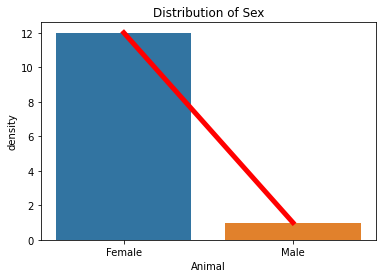

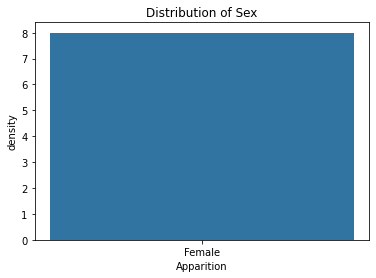

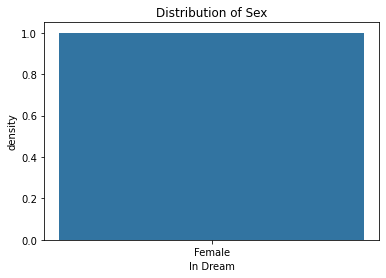

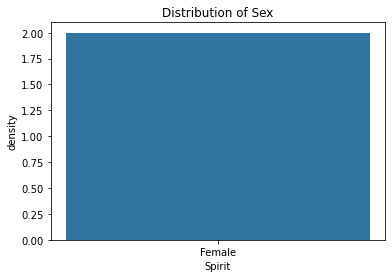

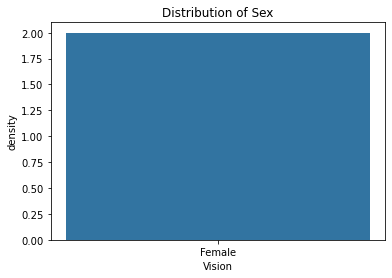

In [69]:
for key, value in q6:
    x2 = []                                    
    y2 = []
    q7 = value['Sex'].groupby(value['Sex'])                 
    for key2, value2 in q7:
        y2.append(value2.value_counts()[0])                
        x2.append(key2)
    chart4 = sns.barplot(x=x2, y=y2)                    
    chart4.set(xlabel=key, ylabel='density')  
    chart4.set_title('Distribution of Sex') 
    plt.plot(x2, y2, color = 'red', linewidth=5)           
    plt.show()


Findings: Comparing each grpahs above, female is dominated in shapechanging. Man just show in the Animal type. But Female in Animal type is much more than man in it, about more than 11 people.

# Reflection and Hypothesis
From above analysis, I draw out the relationship among the ShapeChaing_Type ( 'WDB_ShapeChanging'), Detail of Shapechanging('WDB_ShapeChanging'), Ritual object type ('WDB_RitualObject')and the Sex(WDB_Accused'), and linked them up by the Caseref ( in The WDB_Case). And I use the Shapechanging Type as the basic research point, and draw other relationship around it by other tables. In each column, there is a extremely frequent variable. It does mean that it is the most frequent type in the witches' period. And combine those frequent element, I can roughly draw an image of withes under this analysis. Witches had close relationship between animal, and usually used natural resources/material to apply into their magic or lives. And female is the largest group of witches, and this also relfect on the types of shape changing and ritual object.

Firstly,the distribution of shapechanging type can draw that witches has clear preference for being an animal. And cat is the most. It reminds me that many people who annouce themselces as witches always has a black cat or some animal around them. For it, I assume that it is tightly related to the similar structure between people and animal. Animal can more easily transfer magic to people. And, in the previous age of Europe, there was serious plague and caused a riot. Rat and cat has close relationship. And rats seen as the tribute to cats, and rats can deliver the devil to the cat. So, at that time, people might think that cat is unfortunate to their diseases, and there were so many witches accused in Animal type, especially in Cat type.

Secondly,for the relationship between the shapechanging and the ritual object type, we can see that 'cat' is also and always used in ritual objct. The reason might be as above. Assumption: The type of ritual object might consist of the shapechanging type. For example, in the Animal type, the water ranks in the first place. We know that water is the most needed resources to keep living. And there are also some other types like: flesh, grain, nail, salt, etc. Thus, to test this hypothesis, in the future, we can use machine to analysis each biological element type of shapechanging, and use regression algorithm to learn the relevent between the biogical elment and the numbers of ritual object.

Thirdly, for the relationship between sex of the accused and the shapechanging. Almost are female. And the only one male is in the Animal Types. Assumption: female witches are accused more than male. It might be that witches has sexual behavior with devil.Female are more than male who can do it with devil. And, why the man is just in Animal type? In my assumption, as the first assumption, witches can more easily transfer in animal type, it gives much more probability for it. And, it might be that the other types of shapechanging type is more like something emotional. And generally, female tranfer emotional stuff more frequent than male. How to test this assumption? In my opinion, I think using machine learning to study the characteristic of different shape changing type, and the charisteristics of male and female. And then we can see how male and female related to different shape changing types' charisteritics.

Generally speaking, the topic of withes is more relevent to the folk culture, and it is also somehow obey by the nature laws(like the composition of a living). Thus, having more further cultural and historical discussion with dataholder, using machine learning and biological anlysis comparsion can have more further study their relationship.